In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift
from scipy.signal import find_peaks

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Remove audio from video
in_file_path = "/content/drive/MyDrive/CS14B043_CS6650_HW1/sampleX.mp4" #@param {type:"string"}
out_file_path = "/content/drive/MyDrive/CS14B043_CS6650_HW1/60fps_1920_1080_flash_5.mp4" #@param {type:"string"}
os.environ['inFile'] = in_file_path
os.environ['outFile'] = out_file_path

!ffmpeg -i "$inFile" -c copy -an "$outFile"

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
# change fps and resolution
in_file_path = "/content/drive/MyDrive/CS14B043_CS6650_HW1/60fps_1920_1080_flash_5.mp4" #@param {type:"string"}
out_file_path = "/content/drive/MyDrive/CS14B043_CS6650_HW1/10fps_192_108_flash_5.mp4" #@param {type:"string"}

!ffmpeg -i "$in_file_path" -vf "scale=192:108" -filter:v fps=10 "$out_file_path"

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
# finding raw RGB pixel values
in_file_path = "/content/drive/MyDrive/CS14B043_CS6650_HW1/10fps_192_108_flash_5.mp4" #@param {type:"string"}

video = cv2.VideoCapture(in_file_path);
if (video.isOpened() == False):  
    print("Error reading video file")

nFrames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(video.get(cv2.CAP_PROP_FPS))

r_raw = []
g_raw = []
b_raw = []

i = 0
while(True):
    ret, frame = video.read()
    
    if ret == True:
        frame = cv2.GaussianBlur(frame,(11,11),0)
        xb,xg,xr = cv2.split(frame)
        b_raw.append(np.mean(xb))
        g_raw.append(np.mean(xg))
        r_raw.append(np.mean(xr))

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
    i += 1

video.release() 

cv2.destroyAllWindows() 

In [ ]:
r = r_raw
g = g_raw
b = b_raw

In [ ]:
# Normalizing data
r = (r_raw - np.mean(r_raw))/np.std(r_raw)
b = (b_raw - np.mean(b_raw))/np.std(b_raw)
g = (g_raw - np.mean(g_raw))/np.std(g_raw)

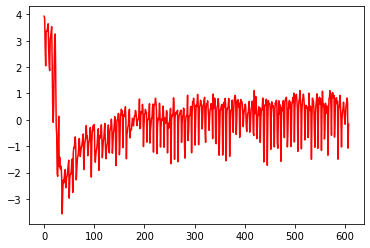

In [ ]:
plt.plot(r,'r')

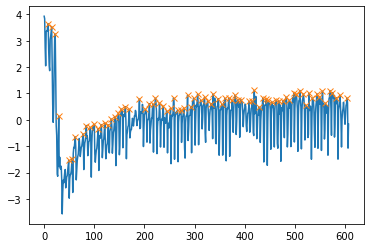

In [ ]:
peaks, properties = find_peaks(r, prominence=1, width=5/60*fps)
properties["prominences"], properties["widths"]

plt.plot(r)
plt.plot(peaks, r[peaks], "x")
plt.show()

In [ ]:
t0 =  5#@param {type:"integer"}
print("Time domain approach")
j = 0
n = int(nFrames/(t0*fps))
for i in range(1,n):
    c = 0
    while(peaks[j]<=i*t0*fps):
            c += 1
            j +=1
    print(int(c/t0*60),"BPM")

Time domain approach
60 BPM
72 BPM
84 BPM
48 BPM
84 BPM
96 BPM
84 BPM
84 BPM
84 BPM
84 BPM
96 BPM


In [ ]:
T = 1.0 / fps
t = np.linspace(0.0, nFrames*T, nFrames, endpoint=False)

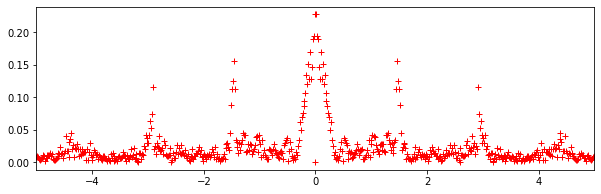

In [ ]:
# FFT Approach to find out BPM

fig = plt.figure(figsize=(10,3))
ax = plt.subplot(1,1,1)
rf = fft(r)
tf = fftfreq(nFrames, T)
tf = fftshift(tf)
rplot = fftshift(rf)

ax.plot(tf, 1.0/nFrames * np.abs(rplot),'r+')
ax.set_xlim(-5,5)
plt.show(fig)

In [ ]:
# find maxima
x = 1.0/nFrames * np.abs(rplot)
peak, _ = find_peaks(x, height=(0.21,0.5))
print(int(tf[peak[-1]]*60),"BPM")

0 BPM


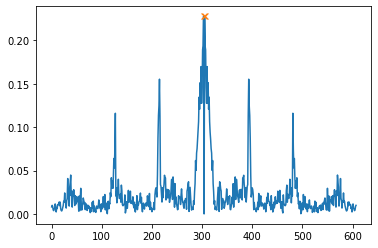

In [ ]:
plt.plot(x)
plt.plot(peak, x[peak], "x")
plt.show()

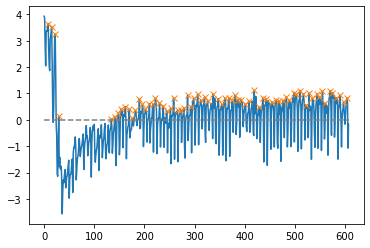

In [ ]:
# Don't Use
peaks, _ = find_peaks(r,height=0,distance=30/60*fps)
plt.plot(r)
plt.plot(peaks, r[peaks], "x")
plt.plot(np.zeros_like(r), "--", color="gray")
plt.show()

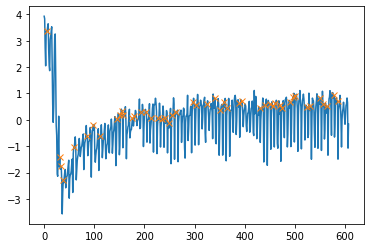

In [ ]:
# No use
peaks, properties = find_peaks(r, prominence=(None, 0.5))
properties["prominences"].max()

plt.plot(r)
plt.plot(peaks, r[peaks], "x")
plt.show()